In [8]:
import xml.etree.ElementTree as et
tree = et.parse('test.xml')
root = tree.getroot()
experiments = root.findall('experiment')
for experiment in experiments:
    date = experiment.find('collectdate')
    print("Tag: ", experiment.tag, "Attrib: ", experiment.attrib, "Date: ", date.text)

Tag:  experiment Attrib:  {'name': 'Blank'} Date:  2017-10-17T23:21:43Z
Tag:  experiment Attrib:  {'name': 'Blank'} Date:  2017-10-17T23:46:53Z
Tag:  experiment Attrib:  {'name': 'column conditioning - Standard (CSL346_IRS1 9.8mg/mL)'} Date:  2017-10-18T00:14:07Z
Tag:  experiment Attrib:  {'name': 'column conditioning - Standard (CSL346_IRS1 9.8mg/mL)'} Date:  2017-10-18T00:41:21Z
Tag:  experiment Attrib:  {'name': 'Blank'} Date:  2017-10-18T01:06:32Z
Tag:  experiment Attrib:  {'name': 'Blank'} Date:  2017-10-18T01:31:43Z
Tag:  experiment Attrib:  {'name': 'Standard (CSL346_IRS1 9.8mg/mL)'} Date:  2017-10-18T01:58:53Z
Tag:  experiment Attrib:  {'name': 'Standard (CSL346_IRS1 9.8mg/mL)'} Date:  2017-10-18T02:26:01Z
Tag:  experiment Attrib:  {'name': 'Standard (CSL346_IRS1 9.8mg/mL)'} Date:  2017-10-18T02:53:09Z
Tag:  experiment Attrib:  {'name': 'Blank'} Date:  2017-10-18T03:18:20Z
Tag:  experiment Attrib:  {'name': 'CSL346_IRS1'} Date:  2017-10-18T03:45:32Z
Tag:  experiment Attrib:  {'

In [ ]:

import struct
import base64

struct.unpack('<d', base64.decodebytes(b'AAAAAAAALkA='))

Tag:  experiment Attrib:  {'name': 'Blank'} Date:  2017-10-17T23:21:43Z
Tag:  experiment Attrib:  {'name': 'Blank'} Date:  2017-10-17T23:46:53Z
Tag:  experiment Attrib:  {'name': 'column conditioning - Standard (CSL346_IRS1 9.8mg/mL)'} Date:  2017-10-18T00:14:07Z
Tag:  experiment Attrib:  {'name': 'column conditioning - Standard (CSL346_IRS1 9.8mg/mL)'} Date:  2017-10-18T00:41:21Z
Tag:  experiment Attrib:  {'name': 'Blank'} Date:  2017-10-18T01:06:32Z
Tag:  experiment Attrib:  {'name': 'Blank'} Date:  2017-10-18T01:31:43Z
Tag:  experiment Attrib:  {'name': 'Standard (CSL346_IRS1 9.8mg/mL)'} Date:  2017-10-18T01:58:53Z
Tag:  experiment Attrib:  {'name': 'Standard (CSL346_IRS1 9.8mg/mL)'} Date:  2017-10-18T02:26:01Z
Tag:  experiment Attrib:  {'name': 'Standard (CSL346_IRS1 9.8mg/mL)'} Date:  2017-10-18T02:53:09Z
Tag:  experiment Attrib:  {'name': 'Blank'} Date:  2017-10-18T03:18:20Z
Tag:  experiment Attrib:  {'name': 'CSL346_IRS1'} Date:  2017-10-18T03:45:32Z
Tag:  experiment Attrib:  {'

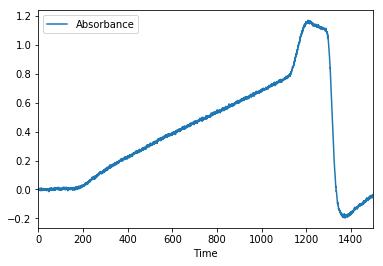

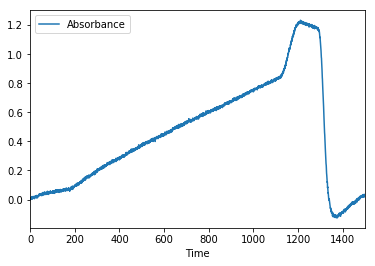

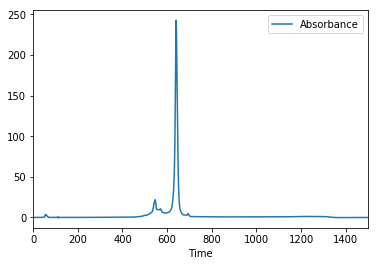

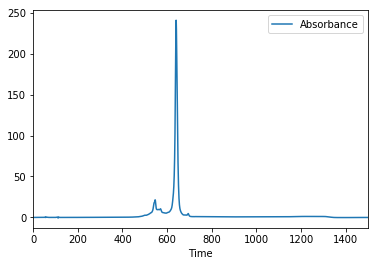

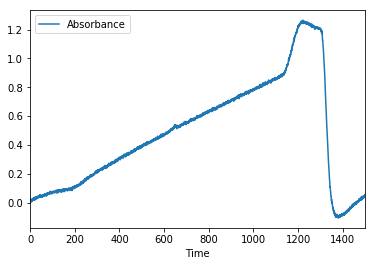

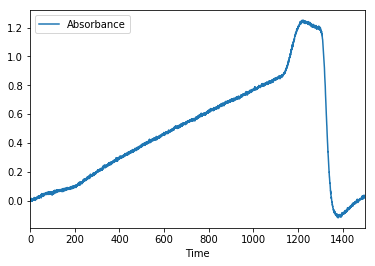

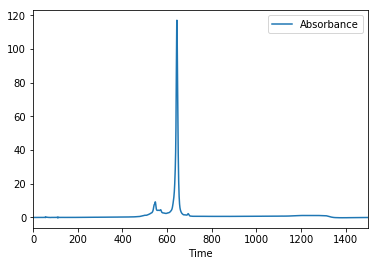

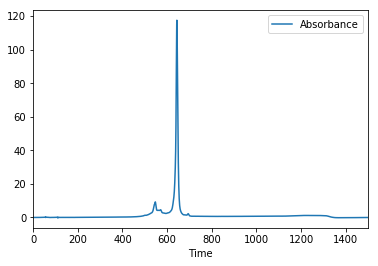

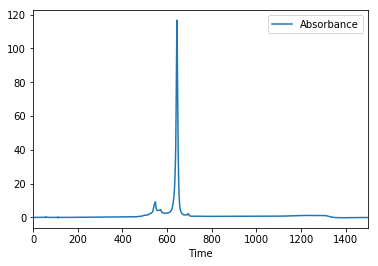

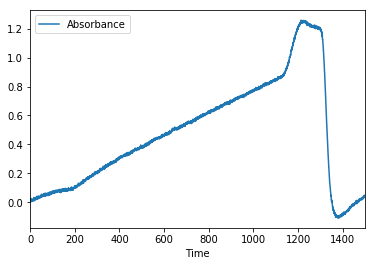

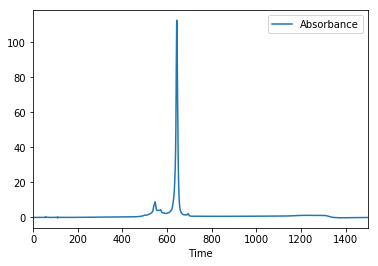

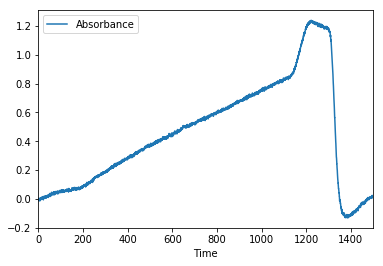

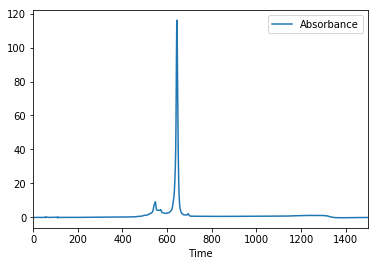

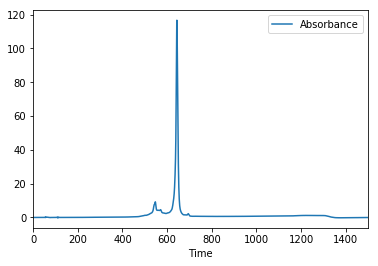

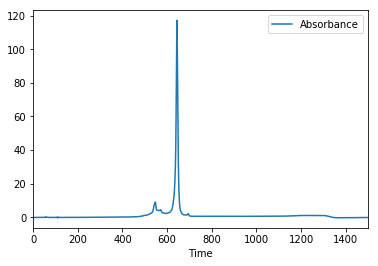

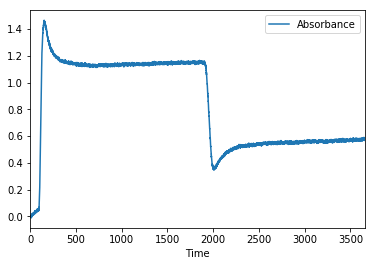

In [52]:
import struct
import base64
import pandas as pd
%matplotlib inline

dataframes = []

for experiment in experiments:
    rows = []
    times = []
    absorbance = []
    
    date = experiment.find('collectdate').text
    print("Tag: ", experiment.tag, "Attrib: ", experiment.attrib, "Date: ", date)
    xvalues = experiment.find('trace/Xdata/values')
    #print(len(xvalues.text))
    #print(xvalues.attrib['numvalues'])
    b = base64.b64decode(xvalues.text.encode('ascii')) # Converting the Base64 encoded bytes back into bytes
    #print(len(b))
    for i in range(0,len(b),8):
        times.append(struct.unpack('<d', b[i:i+8])[0])
    
    yvalues = experiment.find('trace/Xdata/Ydata/values')
    b = base64.b64decode(yvalues.text.encode('ascii')) # Converting the Base64 encoded bytes back into bytes
    
    for i in range(0,len(b),8):
        absorbance.append(struct.unpack('<d', b[i:i+8])[0])
   
    for i in range(len(times)):
        rows.append({'Time': times[i], 'Absorbance': absorbance[i]})
        
    df = pd.DataFrame(rows)
    df = df.set_index('Time')
    dataframes.append(df)
    #print(df.head())
    #df.plot()

for df in dataframes:
    df.plot()

In [28]:
b[:8]

b'\x00\x00\x00\x00\x00\x00\x00\x00'

In [40]:
for i in range(0,len(b),8):
    print(i//8, struct.unpack('<d', b[i:i+8]))
    

0 (0.0,)
1 (0.2,)
2 (0.4,)
3 (0.6,)
4 (0.8,)
5 (1.0,)
6 (1.2,)
7 (1.4000000000000001,)
8 (1.6,)
9 (1.7999999999999998,)
10 (2.0,)
11 (2.2,)
12 (2.4,)
13 (2.6,)
14 (2.8000000000000003,)
15 (3.0,)
16 (3.2,)
17 (3.4,)
18 (3.5999999999999996,)
19 (3.8000000000000003,)
20 (4.0,)
21 (4.2,)
22 (4.4,)
23 (4.6,)
24 (4.8,)
25 (5.0,)
26 (5.2,)
27 (5.3999999999999995,)
28 (5.6000000000000005,)
29 (5.8,)
30 (6.0,)
31 (6.2,)
32 (6.4,)
33 (6.6,)
34 (6.8,)
35 (7.0,)
36 (7.199999999999999,)
37 (7.4,)
38 (7.6000000000000005,)
39 (7.800000000000001,)
40 (8.0,)
41 (8.2,)
42 (8.4,)
43 (8.6,)
44 (8.8,)
45 (9.0,)
46 (9.2,)
47 (9.4,)
48 (9.6,)
49 (9.8,)
50 (10.0,)
51 (10.200000000000001,)
52 (10.4,)
53 (10.6,)
54 (10.799999999999999,)
55 (11.0,)
56 (11.200000000000001,)
57 (11.4,)
58 (11.6,)
59 (11.799999999999999,)
60 (12.0,)
61 (12.200000000000001,)
62 (12.4,)
63 (12.6,)
64 (12.8,)
65 (13.0,)
66 (13.2,)
67 (13.4,)
68 (13.6,)
69 (13.8,)
70 (14.0,)
71 (14.2,)
72 (14.399999999999999,)
73 (14.600000000000001,)


1093 (218.60000000000002,)
1094 (218.79999999999998,)
1095 (219.0,)
1096 (219.2,)
1097 (219.4,)
1098 (219.60000000000002,)
1099 (219.8,)
1100 (220.0,)
1101 (220.2,)
1102 (220.4,)
1103 (220.6,)
1104 (220.8,)
1105 (221.0,)
1106 (221.2,)
1107 (221.4,)
1108 (221.6,)
1109 (221.8,)
1110 (222.0,)
1111 (222.2,)
1112 (222.4,)
1113 (222.6,)
1114 (222.8,)
1115 (223.0,)
1116 (223.20000000000002,)
1117 (223.39999999999998,)
1118 (223.6,)
1119 (223.8,)
1120 (224.0,)
1121 (224.20000000000002,)
1122 (224.4,)
1123 (224.6,)
1124 (224.79999999999998,)
1125 (225.0,)
1126 (225.20000000000002,)
1127 (225.4,)
1128 (225.6,)
1129 (225.79999999999998,)
1130 (226.0,)
1131 (226.2,)
1132 (226.4,)
1133 (226.60000000000002,)
1134 (226.79999999999998,)
1135 (227.0,)
1136 (227.2,)
1137 (227.4,)
1138 (227.6,)
1139 (227.8,)
1140 (228.0,)
1141 (228.2,)
1142 (228.4,)
1143 (228.6,)
1144 (228.8,)
1145 (229.0,)
1146 (229.2,)
1147 (229.4,)
1148 (229.6,)
1149 (229.8,)
1150 (230.0,)
1151 (230.2,)
1152 (230.39999999999998,)
1153

2574 (514.8,)
2575 (515.0,)
2576 (515.1999999999999,)
2577 (515.4,)
2578 (515.6,)
2579 (515.8,)
2580 (516.0,)
2581 (516.2,)
2582 (516.4000000000001,)
2583 (516.5999999999999,)
2584 (516.8,)
2585 (517.0,)
2586 (517.1999999999999,)
2587 (517.4,)
2588 (517.6,)
2589 (517.8000000000001,)
2590 (518.0,)
2591 (518.2,)
2592 (518.4000000000001,)
2593 (518.5999999999999,)
2594 (518.8,)
2595 (519.0,)
2596 (519.2,)
2597 (519.4,)
2598 (519.6,)
2599 (519.8000000000001,)
2600 (520.0,)
2601 (520.2,)
2602 (520.4,)
2603 (520.5999999999999,)
2604 (520.8,)
2605 (521.0,)
2606 (521.2,)
2607 (521.4,)
2608 (521.6,)
2609 (521.8000000000001,)
2610 (522.0,)
2611 (522.2,)
2612 (522.4,)
2613 (522.6,)
2614 (522.8,)
2615 (523.0,)
2616 (523.2,)
2617 (523.4,)
2618 (523.6,)
2619 (523.8000000000001,)
2620 (524.0,)
2621 (524.1999999999999,)
2622 (524.4,)
2623 (524.6,)
2624 (524.8,)
2625 (525.0,)
2626 (525.2,)
2627 (525.4,)
2628 (525.6,)
2629 (525.8000000000001,)
2630 (526.0,)
2631 (526.1999999999999,)
2632 (526.4,)
2633 (

4082 (816.4000000000001,)
4083 (816.5999999999999,)
4084 (816.8,)
4085 (817.0,)
4086 (817.1999999999999,)
4087 (817.4,)
4088 (817.6,)
4089 (817.8000000000001,)
4090 (818.0,)
4091 (818.2,)
4092 (818.4000000000001,)
4093 (818.5999999999999,)
4094 (818.8,)
4095 (819.0,)
4096 (819.2,)
4097 (819.4,)
4098 (819.6,)
4099 (819.8000000000001,)
4100 (820.0,)
4101 (820.2,)
4102 (820.4,)
4103 (820.5999999999999,)
4104 (820.8,)
4105 (821.0,)
4106 (821.2,)
4107 (821.4,)
4108 (821.6,)
4109 (821.8000000000001,)
4110 (822.0,)
4111 (822.2,)
4112 (822.4,)
4113 (822.6,)
4114 (822.8,)
4115 (823.0,)
4116 (823.2,)
4117 (823.4,)
4118 (823.6,)
4119 (823.8000000000001,)
4120 (824.0,)
4121 (824.1999999999999,)
4122 (824.4,)
4123 (824.6,)
4124 (824.8,)
4125 (825.0,)
4126 (825.2,)
4127 (825.4,)
4128 (825.6,)
4129 (825.8000000000001,)
4130 (826.0,)
4131 (826.1999999999999,)
4132 (826.4,)
4133 (826.6,)
4134 (826.8,)
4135 (827.0,)
4136 (827.2,)
4137 (827.4,)
4138 (827.6,)
4139 (827.8,)
4140 (828.0,)
4141 (828.19999999

5431 (1086.1999999999998,)
5432 (1086.3999999999999,)
5433 (1086.6,)
5434 (1086.8,)
5435 (1087.0,)
5436 (1087.2,)
5437 (1087.4,)
5438 (1087.6,)
5439 (1087.8,)
5440 (1088.0,)
5441 (1088.2,)
5442 (1088.4,)
5443 (1088.6000000000001,)
5444 (1088.8000000000002,)
5445 (1089.0,)
5446 (1089.2,)
5447 (1089.4,)
5448 (1089.6,)
5449 (1089.8,)
5450 (1090.0,)
5451 (1090.2,)
5452 (1090.3999999999999,)
5453 (1090.6,)
5454 (1090.8,)
5455 (1091.0,)
5456 (1091.2,)
5457 (1091.4,)
5458 (1091.6,)
5459 (1091.8,)
5460 (1092.0,)
5461 (1092.2,)
5462 (1092.4,)
5463 (1092.6000000000001,)
5464 (1092.8000000000002,)
5465 (1093.0,)
5466 (1093.1999999999998,)
5467 (1093.3999999999999,)
5468 (1093.6,)
5469 (1093.8,)
5470 (1094.0,)
5471 (1094.2,)
5472 (1094.3999999999999,)
5473 (1094.6,)
5474 (1094.8,)
5475 (1095.0,)
5476 (1095.2,)
5477 (1095.4,)
5478 (1095.6000000000001,)
5479 (1095.8,)
5480 (1096.0,)
5481 (1096.2,)
5482 (1096.4,)
5483 (1096.6000000000001,)
5484 (1096.8000000000002,)
5485 (1097.0,)
5486 (1097.19999999

6912 (1382.3999999999999,)
6913 (1382.6,)
6914 (1382.8,)
6915 (1383.0,)
6916 (1383.2,)
6917 (1383.4,)
6918 (1383.6,)
6919 (1383.8,)
6920 (1384.0,)
6921 (1384.2,)
6922 (1384.4,)
6923 (1384.6000000000001,)
6924 (1384.8,)
6925 (1385.0,)
6926 (1385.2,)
6927 (1385.4,)
6928 (1385.6,)
6929 (1385.8,)
6930 (1386.0,)
6931 (1386.1999999999998,)
6932 (1386.3999999999999,)
6933 (1386.6,)
6934 (1386.8,)
6935 (1387.0,)
6936 (1387.2,)
6937 (1387.4,)
6938 (1387.6,)
6939 (1387.8,)
6940 (1388.0,)
6941 (1388.2,)
6942 (1388.4,)
6943 (1388.6000000000001,)
6944 (1388.8000000000002,)
6945 (1389.0,)
6946 (1389.2,)
6947 (1389.4,)
6948 (1389.6,)
6949 (1389.8,)
6950 (1390.0,)
6951 (1390.2,)
6952 (1390.3999999999999,)
6953 (1390.6,)
6954 (1390.8,)
6955 (1391.0,)
6956 (1391.2,)
6957 (1391.4,)
6958 (1391.6,)
6959 (1391.8,)
6960 (1392.0,)
6961 (1392.2,)
6962 (1392.4,)
6963 (1392.6000000000001,)
6964 (1392.8000000000002,)
6965 (1393.0,)
6966 (1393.1999999999998,)
6967 (1393.3999999999999,)
6968 (1393.6,)
6969 (1393.8,